<a href="https://colab.research.google.com/github/ouzbe/imagprocces_py/blob/main/Face_detecet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
nadia = cv2.imread('Nadia_Murad.jpg',0)

In [ ]:
denis = cv2.imread('Denis_Mukwege.jpg',0)

In [ ]:
solvay = cv2.imread('solvay_conference.jpg',0)

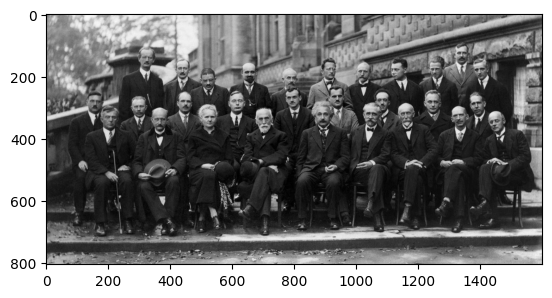

In [ ]:
plt.imshow(solvay,cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [ ]:
def detect_face(img):
  face_img = img.copy()
  face_rects = face_cascade.detectMultiScale(face_img)
  for (x,y,w,h) in face_rects:
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
  return face_img

In [ ]:
result = detect_face(solvay)

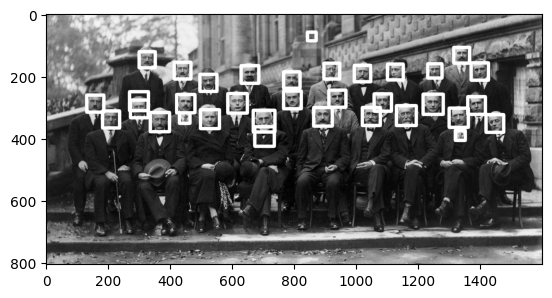

In [ ]:
plt.imshow(result,cmap='gray')

In [ ]:
def adj_detect_face(img):
  face_img = img.copy()
  face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.13,minNeighbors=5)
  for (x,y,w,h) in face_rects:
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
  return face_img

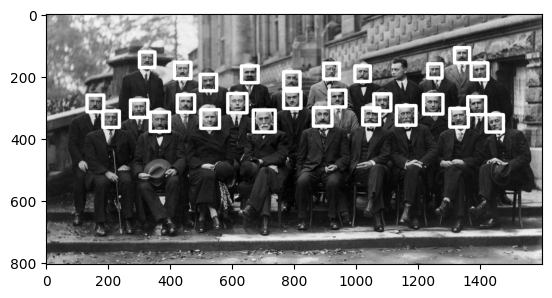

In [ ]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [ ]:
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [ ]:
def detect_eye(img):

  face_img = img.copy()

  eyes_rects = eye_cascade.detectMultiScale(face_img)

  for (x,y,w,h) in eyes_rects:

    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

  return face_img

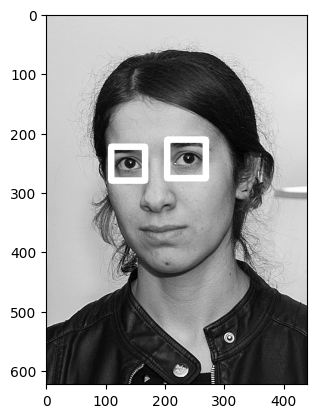

In [ ]:
result = detect_eye(nadia)
plt.imshow(result,cmap='gray')

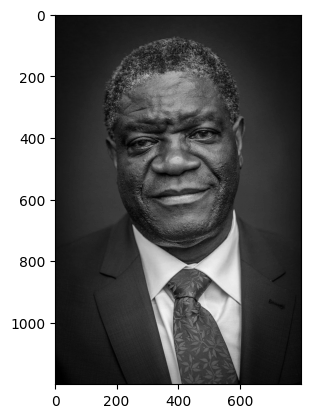

In [ ]:
result = detect_eye(denis)
plt.imshow(result,cmap='gray')

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)

    frame = adj_detect_face(frame)

    cv2.imshow('Video Face Detect',frame)

    k= cv2.waitKey(1)
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()